In [1]:
import os
import numpy as np
import torch
import torch.utils.data
from PIL import Image
import json
import chardet
import torch
import json
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import os
import pandas as pd
from torchvision.io import read_image
from PIL import Image
import json
import chardet
import torchvision.transforms as T

In [2]:
class Mydataset(torch.utils.data.Dataset):
    def __init__(self, root, transform=None, target_transform=None):
        self.root = root
        # load all image files, sorting them to
        # ensure that they are aligned
        self.images = list(sorted(os.listdir(os.path.join(root, "images"))))
        self.labels = list(sorted(os.listdir(os.path.join(root, "labels/json"))))
        self.transform = transform
        self.target_transform = target_transform


    def __getitem__(self, idx):
        # load images ad masks
        img_path = os.path.join(self.root, "images", self.images[idx])
        label_path=os.path.join(self.root, "labels/json", self.labels[idx])
        with open(label_path, 'rb') as f:
            result = chardet.detect(f.read())
        encoding = result['encoding']
        with open(label_path, 'r',encoding=encoding) as f:
            label = json.load(f)
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
        
    
    def __len__(self):
        return len(self.images)

In [3]:
dataset = Mydataset('sample_dataset/')

In [4]:
dataset[0]

(<PIL.Image.Image image mode=RGB size=1280x720>,
 [{'Id': 0,
   'ObjectClassName': 'Wheel',
   'ObjectClassId': 1,
   'Left': 505,
   'Top': 363,
   'Right': 544,
   'Bottom': 422,
   'Confidence': None,
   'SourceModel': None,
   'Prediction': None,
   'PredictionClass': None},
  {'Id': 1,
   'ObjectClassName': 'Wheel',
   'ObjectClassId': 1,
   'Left': 470,
   'Top': 366,
   'Right': 500,
   'Bottom': 418,
   'Confidence': None,
   'SourceModel': None,
   'Prediction': None,
   'PredictionClass': None},
  {'Id': 2,
   'ObjectClassName': 'Wheel',
   'ObjectClassId': 1,
   'Left': 707,
   'Top': 366,
   'Right': 735,
   'Bottom': 414,
   'Confidence': None,
   'SourceModel': None,
   'Prediction': None,
   'PredictionClass': None},
  {'Id': 3,
   'ObjectClassName': 'Wheel',
   'ObjectClassId': 1,
   'Left': 770,
   'Top': 361,
   'Right': 813,
   'Bottom': 415,
   'Confidence': None,
   'SourceModel': None,
   'Prediction': None,
   'PredictionClass': None},
  {'Id': 4,
   'ObjectClass

In [22]:
def show_image(img, label, ax):
    ax.imshow(img)
    ax.axis('off')
    for obj in label:
        bbox = obj['Left'], obj['Top'], obj['Right'], obj['Bottom']
        cls = obj['ObjectClassName']
        ax.add_patch(plt.Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1], fill=False, edgecolor='red', linewidth=1))
        ax.text(bbox[0], bbox[1]-10, cls, fontsize=8, color='red')


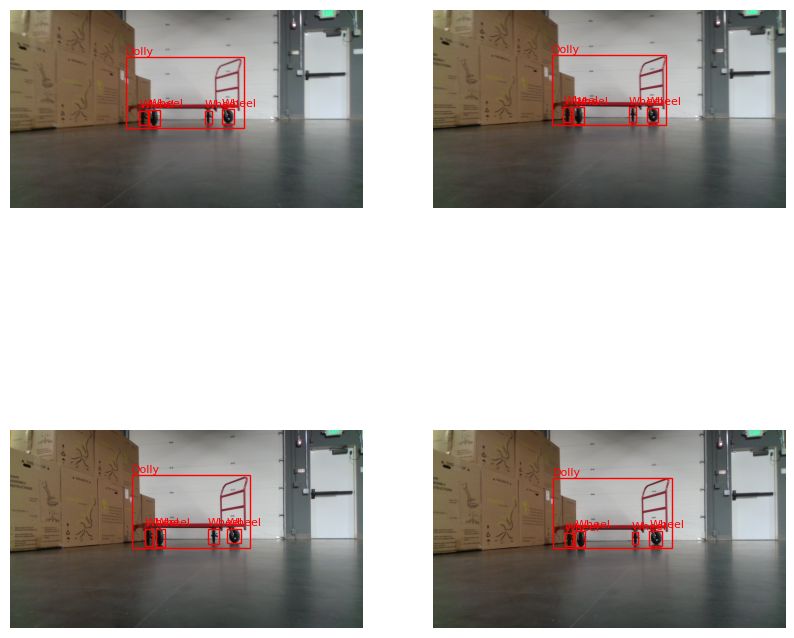

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    img, label = dataset[i]
    ax = axes[i//2, i%2]
    show_image(img, label, ax)
plt.show()

In [ ]:
# 1280 x 720

In [21]:
""" import os
import json

# Define the input and output directories
input_dir = 'sample_dataset/labels/json'
output_dir = 'sample_dataset/labels/yolo'

# Define a dictionary to map class names to class indices
class_map = {'Dolly': 0, 'Wheel': 1}

# Loop over all the JSON files in the input directory
for json_file in os.listdir(input_dir):
    # Skip non-JSON files
    if not json_file.endswith('.json'):
        continue

    # Open the JSON file containing the labels
    with open(os.path.join(input_dir, json_file), 'rb') as f:
        result = chardet.detect(f.read())
    encoding = result['encoding']
    #print(encoding)
    with open(os.path.join(input_dir, json_file), 'r',encoding=encoding) as f:
        data = json.load(f)
    
    # Extract the object information from the dictionary
    objects = data

    # Convert each object to YOLO format and save to a TXT file
    txt_file = os.path.splitext(json_file)[0] + '.txt'
    with open(os.path.join(output_dir, txt_file), 'w') as f:
        for obj in objects:
            # Extract the class name and bounding box coordinates
            class_name = obj['ObjectClassName']
            x1, y1, x2, y2 = obj['Left'], obj['Top'], obj['Right'], obj['Bottom']
            w, h = x2 - x1, y2 - y1

            # Convert the class name to a class index
            class_idx = class_map[class_name]

            # Compute the center (x, y) coordinate and the normalized (0 to 1) width and height
            x_center = (x1 + w/2) / 1280
            y_center = (y1 + h/2) / 720
            width = w / 1280
            height = h / 720

            # Write the object information to the TXT file
            line = f"{class_idx} {x_center} {y_center} {width} {height}\n"
            f.write(line) """

In [3]:
!git clone https://github.com/ultralytics/yolov5 

Cloning into 'yolov5'...


In [5]:
!cd yolov5 && pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Train YOLOv5s on COCO128 for 3 epochs
!cd yolov5 && python train.py --img 200 --batch 16 --epochs 3 --data dataset.yaml --weights yolov5s.pt

requirements: C:\Users\user\Desktop\inmind\AI_CV\week 4\my_workspace\requirements.txt not found, check failed.


train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=200, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=cuda, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\user\Desktop\inmind\AI_CV\week': No such file or directory
Traceback (most recent call last):
  File "c:\Users\user\Desktop\inmind\AI_CV\week 4\my_workspace\yolov5\train.py", line 640, in <module>
    main(opt)
  File "c:\Users\user\Desktop\inmind\AI_CV\week 4\my_workspace\yolov5\train.py", line 515, in main
  